** Statistics Part 2**

Q1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
interpret the results.

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# Sample data
sample_data = [12, 15, 11, 13, 14, 16, 12, 10, 13, 15]

# Known population mean and standard deviation
population_mean = 11.5
population_std = 2.5

# Perform Z-test
z_statistic, p_value = ztest(sample_data, value=population_mean, alternative='two-sided', ddof=1)

# Interpret the results
alpha = 0.05  # Significance level

print(f"Sample Data: {sample_data}")
print(f"Population Mean (Known): {population_mean}")
print(f"Population Standard Deviation (Known): {population_std}")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Interpretation: Reject the null hypothesis. There is significant evidence to suggest that the sample mean is different from the population mean.")
else:
    print("Interpretation: Fail to reject the null hypothesis. There is not enough evidence to suggest that the sample mean is different from the population mean.")

Q2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

In [ ]:
import numpy as np
from scipy import stats

# Simulate random data
np.random.seed(42) # for reproducibility
sample_size = 30
population_mean = 50
sample_data = np.random.normal(loc=population_mean, scale=10, size=sample_size)

# Hypothesized population mean (under the null hypothesis)
hypothesized_mean = 52

### Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, hypothesized_mean)

# Print the results #
print(f"Simulated Sample Data (first 10): {sample_data[:10]}")
print(f"Hypothesized Population Mean: {hypothesized_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

## Interpret the results (optional)
alpha = 0.05
if p_value < alpha:
    print("Interpretation: Reject the null hypothesis. There is significant evidence that the sample mean is different from the hypothesized population mean.")
else:
    print("Interpretation: Fail to reject the null hypothesis. There is not enough evidence to suggest that the sample mean is different from the hypothesized population mean.")

Q3.  Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [2]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# Sample data
sample_data = [12, 15, 11, 13, 14, 16, 12, 10, 13, 15]

## population mean
population_mean = 11.5

population_std = 2.5
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate the standard error of the mean
standard_error = population_std / np.sqrt(sample_size)

## Z-statistic
z_statistic = (sample_mean - population_mean) / standard_error

p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))


# Print the results
print(f"Sample Data: {sample_data}")
print(f"Population Mean (Known): {population_mean}")
print(f"Population Standard Deviation (Known): {population_std}")
print(f"Sample Mean: {sample_mean}")
print(f"Sample Size: {sample_size}")
print(f"Standard Error of the Mean: {standard_error}")
print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Interpretation: Reject the null hypothesis. There is significant evidence to suggest that the sample mean is different from the population mean.")
else:
    print("Interpretation: Fail to reject the null hypothesis. There is not enough evidence to suggest that the sample mean is different from the population mean.")


Sample Data: [12, 15, 11, 13, 14, 16, 12, 10, 13, 15]
Population Mean (Known): 11.5
Population Standard Deviation (Known): 2.5
Sample Mean: 13.1
Sample Size: 10
Standard Error of the Mean: 0.7905694150420948
Z-statistic: 2.0238577025077626
P-value: 0.04298479507085862
Interpretation: Reject the null hypothesis. There is significant evidence to suggest that the sample mean is different from the population mean.


Q4.  Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

Z-score: 3.20


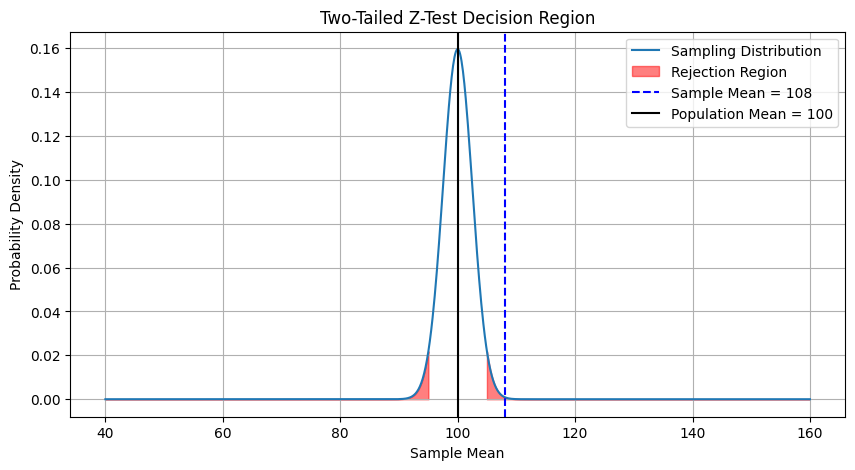

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 100          # Population mean
sigma = 15        # Population std dev
x_bar = 108       # Sample mean
n = 36            # Sample size
alpha = 0.05      # Significance level

# Z-test calculation
z = (x_bar - mu) / (sigma / np.sqrt(n))
print(f"Z-score: {z:.2f}")

# Critical Z-values for two-tailed test
z_critical = norm.ppf(1 - alpha / 2)

# Visualization
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma / np.sqrt(n))

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Sampling Distribution')

# Decision regions
plt.fill_between(x, y, where=(x <= mu - z_critical * (sigma / np.sqrt(n))), color='red', alpha=0.5, label='Rejection Region')
plt.fill_between(x, y, where=(x >= mu + z_critical * (sigma / np.sqrt(n))), color='red', alpha=0.5)

# Sample mean line
plt.axvline(x_bar, color='blue', linestyle='--', label=f'Sample Mean = {x_bar}')
plt.axvline(mu, color='black', linestyle='-', label=f'Population Mean = {mu}')

# Labels
plt.title("Two-Tailed Z-Test Decision Region")
plt.xlabel("Sample Mean")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


Q5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type1_type2(mu0, mu1, sigma, n, alpha=0.05, tail='two-sided'):

    se = sigma / np.sqrt(n)

    # Critical values
    if tail == 'two-sided':
        z_crit = norm.ppf(1 - alpha / 2)
        lower_crit = mu0 - z_crit * se
        upper_crit = mu0 + z_crit * se
    elif tail == 'left':
        z_crit = norm.ppf(alpha)
        lower_crit = mu0 + z_crit * se
        upper_crit = np.inf
    elif tail == 'right':
        z_crit = norm.ppf(1 - alpha)
        lower_crit = -np.inf
        upper_crit = mu0 + z_crit * se
    else:
        raise ValueError("tail must be 'two-sided', 'left', or 'right'")

    # Range for plotting
    x = np.linspace(mu0 - 4*se, mu1 + 4*se, 1000)
    y0 = norm.pdf(x, mu0, se)
    y1 = norm.pdf(x, mu1, se)

    plt.figure(figsize=(10, 5))

    # Plot null distribution
    plt.plot(x, y0, label='H₀ distribution', color='blue')
    plt.fill_between(x, y0, where=((x <= lower_crit) | (x >= upper_crit)), color='red', alpha=0.4, label='Type I Error (α)')

    # Plot alternative distribution
    plt.plot(x, y1, label='H₁ distribution', color='green')
    if tail == 'two-sided':
        beta_region = (x > lower_crit) & (x < upper_crit)
    elif tail == 'left':
        beta_region = x > lower_crit
    elif tail == 'right':
        beta_region = x < upper_crit
    plt.fill_between(x, y1, where=beta_region, color='orange', alpha=0.4, label='Type II Error (β)')

    # Labels and formatting
    plt.title("Type I and Type II Errors in Hypothesis Testing")
    plt.xlabel("Sample Mean")
    plt.ylabel("Probability Density")
    plt.axvline(mu0, color='blue', linestyle='--', label='μ₀ (Null Mean)')
    plt.axvline(mu1, color='green', linestyle='--', label='μ₁ (Alt Mean)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
visualize_type1_type2(mu0=100, mu1=105, sigma=15, n=30, alpha=0.05, tail='two-sided')


Q6. Write a Python program to perform an independent T-test and interpret the results.

In [5]:
import numpy as np
from scipy.stats import ttest_ind

# Sample data (replace with your actual data)
group1 = np.array([85, 90, 88, 75, 95, 89, 92])
group2 = np.array([78, 82, 84, 76, 80, 79, 81])

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)  # Assume equal variance; set to False if not

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value < {alpha}, we reject the null hypothesis.")
    print("There is a significant difference between the two group means.")
else:
    print(f"Since p-value >= {alpha}, we fail to reject the null hypothesis.")
    print("There is no significant difference between the two group means.")


T-statistic: 2.9387
P-value: 0.0124

Interpretation:
Since p-value < 0.05, we reject the null hypothesis.
There is a significant difference between the two group means.


Q7. Perform a paired sample T-test using Python and visualize the comparison results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# Example data: Before and after scores for the same group
before = np.array([72, 75, 78, 71, 69, 80, 74])
after  = np.array([76, 78, 79, 75, 73, 85, 77])

# Perform paired t-test
t_stat, p_value = ttest_rel(before, after)

# Print results
print(f"Paired T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value < {alpha}, we reject the null hypothesis.")
    print("There is a significant difference between the before and after scores.")
else:
    print(f"Since p-value >= {alpha}, we fail to reject the null hypothesis.")
    print("There is no significant difference between the before and after scores.")

# Visualization
x_labels = np.arange(len(before))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x_labels - width/2, before, width, label='Before', color='skyblue')
plt.bar(x_labels + width/2, after, width, label='After', color='orange')

# Add line for each pair
for i in range(len(before)):
    plt.plot([i - width/2, i + width/2], [before[i], after[i]], color='gray', linestyle='--', alpha=0.7)

plt.title("Paired Sample Comparison (Before vs. After)")
plt.xlabel("Subject")
plt.ylabel("Scores")
plt.xticks(x_labels)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Q8.  Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp, norm

# Simulate sample data
np.random.seed(42)  # for reproducibility
population_mean = 100
population_std = 15
sample_size = 25

# Generate a sample from N(μ=100, σ=15)
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# Introduce a shift to simulate a mean difference
sample_shifted = sample + 5  # actual sample mean now ≠ population mean

# --- Z-Test (known population std) ---
sample_mean = np.mean(sample_shifted)
standard_error = population_std / np.sqrt(sample_size)
z_score = (sample_mean - population_mean) / standard_error
z_p_value = 2 * (1 - norm.cdf(abs(z_score)))  # two-tailed

# --- T-Test (unknown population std) ---
t_stat, t_p_value = ttest_1samp(sample_shifted, population_mean)

# --- Print Comparison ---
print(f"Sample Mean: {sample_mean:.2f}")
print("\nZ-Test Results:")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {z_p_value:.4f}")

print("\nT-Test Results:")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {t_p_value:.4f}")

# --- Interpretation ---
alpha = 0.05
print("\nInterpretation (α = 0.05):")
if z_p_value < alpha:
    print("- Z-test: Reject the null hypothesis (significant difference).")
else:
    print("- Z-test: Fail to reject the null hypothesis.")

if t_p_value < alpha:
    print("- T-test: Reject the null hypothesis (significant difference).")
else:
    print("- T-test: Fail to reject the null hypothesis.")


Q9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance..

In [ ]:
import numpy as np
from scipy.stats import t

def confidence_interval(data, confidence=0.95):

    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_crit = t.ppf((1 + confidence) / 2, df=n-1)
    margin = t_crit * std_err
    lower = mean - margin
    upper = mean + margin
    return mean, lower, upper

# Example usage:
sample_data = [22, 25, 27, 30, 24, 28, 26]
mean, lower, upper = confidence_interval(sample_data)
print(f"Sample Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({lower:.2f}, {upper:.2f})")


Q10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [1]:
import numpy as np
from scipy import stats

def calculate_margin_of_error(data, confidence_level=0.95):

  sample_mean = np.mean(data)
  sample_std = np.std(data, ddof=1)  # Use ddof=1 for sample standard deviation
  sample_size = len(data)

  # Calculate the critical value (t-score)
  alpha = 1 - confidence_level
  degrees_of_freedom = sample_size - 1
  critical_value = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

  # Calculate the standard error
  standard_error = sample_std / np.sqrt(sample_size)

  # Calculate the margin of error
  margin_of_error = critical_value * standard_error

  return margin_of_error

# Example usage:
sample_data = [10, 12, 15, 11, 13, 14, 16, 12, 10, 13]
margin_error = calculate_margin_of_error(sample_data)
print(f"Sample data: {sample_data}")
print(f"Margin of Error (95% confidence): {margin_error}")

sample_data_2 = [25, 28, 30, 26, 29, 27, 31, 25, 28, 30, 32, 26]
margin_error_99 = calculate_margin_of_error(sample_data_2, confidence_level=0.99)
print(f"\nSample data 2: {sample_data_2}")
print(f"Margin of Error (99% confidence): {margin_error_99}")

Sample data: [10, 12, 15, 11, 13, 14, 16, 12, 10, 13]
Margin of Error (95% confidence): 1.4386402649417753

Sample data 2: [25, 28, 30, 26, 29, 27, 31, 25, 28, 30, 32, 26]
Margin of Error (99% confidence): 2.1098690262631052


Q11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

In [ ]:
def bayes_theorem(prior_A, likelihood_B_given_A, prior_not_A, likelihood_B_given_not_A):
    numerator = likelihood_B_given_A * prior_A
    denominator = (likelihood_B_given_A * prior_A) + (likelihood_B_given_not_A * prior_not_A)
    posterior = numerator / denominator
    return posterior

P_A = 0.01                  # 1% of people have the disease
P_B_given_A = 0.99          # 99% true positive rate
P_not_A = 1 - P_A           # 99% don't have the disease
P_B_given_not_A = 0.05      # 5% false positive rate

posterior = bayes_theorem(P_A, P_B_given_A, P_not_A, P_B_given_not_A)
print(f"Probability of having the disease given a positive test: {posterior:.4f}")


13. Perform a Chi-square test for independence between two categorical variables in Python.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Example contingency table (can be from survey data, etc.)
# Rows = Gender (Male, Female)
# Columns = Preferred Device (Laptop, Tablet, Phone)

data = np.array([
    [30, 10, 20],   # Male
    [20, 20, 30]    # Female
])

# Create a DataFrame for clarity
df = pd.DataFrame(data, columns=["Laptop", "Tablet", "Phone"], index=["Male", "Female"])
print("Contingency Table:")
print(df)

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(df)

# Display results
print(f"\nChi-square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, columns=df.columns, index=df.index))

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p < alpha:
    print(f"Since p-value < {alpha}, we reject the null hypothesis.")
    print("There is a significant association between gender and preferred device.")
else:
    print(f"Since p-value >= {alpha}, we fail to reject the null hypothesis.")
    print("There is no significant association between gender and preferred device.")


14.  Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution

In [ ]:
import numpy as np
from scipy.stats import chisquare

# Example: Observed counts from a die roll (fair die expected = equal counts)
observed = np.array([18, 22, 20, 19, 21, 20])  # from rolling a die 120 times
expected = np.array([20, 20, 20, 20, 20, 20])  # expected uniform distribution

# Perform Chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

# Display results
print("Observed counts:", observed)
print("Expected counts:", expected)
print(f"\nChi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value < {alpha}, we reject the null hypothesis.")
    print("The observed distribution significantly differs from the expected.")
else:
    print(f"Since p-value ≥ {alpha}, we fail to reject the null hypothesis.")
    print("The observed distribution does not significantly differ from the expected.")


15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

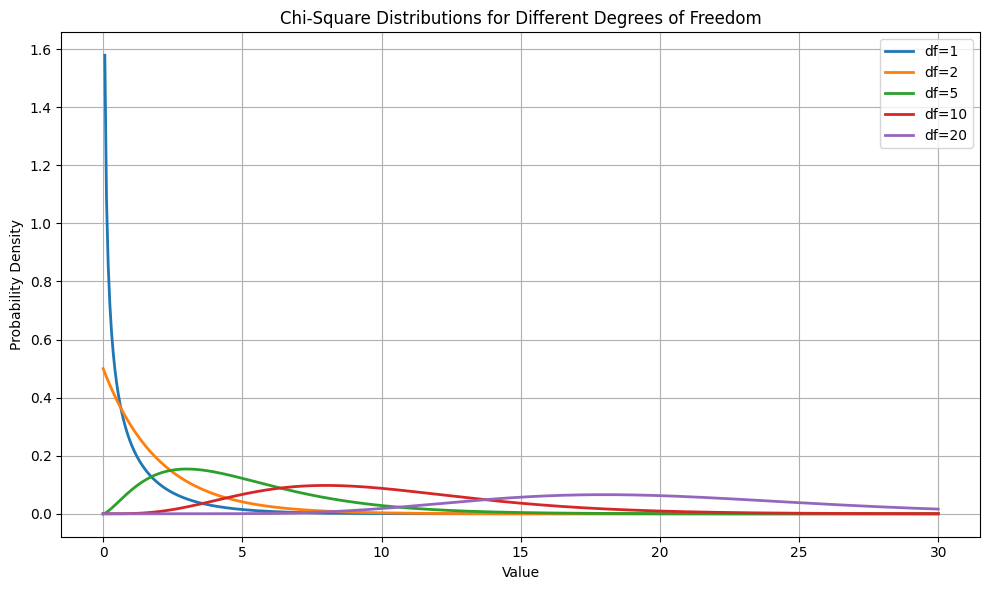

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def plot_chi_square_distribution(df_list, sample_size=10000):

    x = np.linspace(0, 30, 500)

    plt.figure(figsize=(10, 6))
    for df in df_list:
        # Simulate chi-square distributed data
        simulated_data = np.random.chisquare(df, size=sample_size)


        plt.plot(x, chi2.pdf(x, df), label=f'df={df}', linewidth=2)

    plt.title('Chi-Square Distributions for Different Degrees of Freedom')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the function with multiple degrees of freedom
plot_chi_square_distribution(df_list=[1, 2, 5, 10, 20])


16.  Implement an F-test using Python to compare the variances of two random samples.

In [ ]:
import numpy as np
from scipy.stats import f

def f_test(sample1, sample2, alpha=0.05):
    """
    Performs an F-test to compare the variances of two samples.

    Parameters:
    - sample1, sample2: Arrays of sample data
    - alpha: Significance level (default 0.05)

    Returns:
    - F-statistic, P-value, Interpretation
    """
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Determine which sample has the larger variance (F = larger/smaller)
    if var1 > var2:
        F = var1 / var2
        dfn = len(sample1) - 1
        dfd = len(sample2) - 1
    else:
        F = var2 / var1
        dfn = len(sample2) - 1
        dfd = len(sample1) - 1

    # Two-tailed test: calculate p-value
    p_value = 2 * min(f.cdf(F, dfn, dfd), 1 - f.cdf(F, dfn, dfd))

    print(f"Sample 1 Variance: {var1:.4f}")
    print(f"Sample 2 Variance: {var2:.4f}")
    print(f"F-statistic: {F:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpretation
    if p_value < alpha:
        print(f"\nSince p-value < {alpha}, we reject the null hypothesis.")
        print("The variances are significantly different.")
    else:
        print(f"\nSince p-value ≥ {alpha}, we fail to reject the null hypothesis.")
        print("No significant difference in variances.")

# 🔢 Example usage:
np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=30)  # std dev = 10
sample2 = np.random.normal(loc=55, scale=20, size=30)  # std dev = 20

f_test(sample1, sample2)


18. Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Step 1: Simulated data for three groups
np.random.seed(42)
group_A = np.random.normal(loc=50, scale=5, size=30)
group_B = np.random.normal(loc=55, scale=5, size=30)
group_C = np.random.normal(loc=60, scale=5, size=30)

# Step 2: Perform one-way ANOVA
f_stat, p_value = f_oneway(group_A, group_B, group_C)

# Step 3: Print results
print("One-Way ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
alpha = 0.05
print("\nInterpretation:")
if p_value < alpha:
    print(f"Since p-value < {alpha}, we reject the null hypothesis.")
    print("At least one group mean is significantly different.")
else:
    print(f"Since p-value ≥ {alpha}, we fail to reject the null hypothesis.")
    print("No significant difference in group means.")

# Step 5: Visualization using boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([group_A, group_B, group_C], labels=["Group A", "Group B", "Group C"])
plt.title("Group Means Comparison (One-Way ANOVA)")
plt.ylabel("Scores")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene
import statsmodels.api as sm
from statsmodels.formula.api import ols

def check_anova_assumptions(data: pd.DataFrame, dv: str, group: str, alpha=0.05):

    print("=== 1. Normality (Shapiro-Wilk Test on Residuals) ===")
    model = ols(f"{dv} ~ C({group})", data=data).fit()
    residuals = model.resid
    stat, p = shapiro(residuals)
    print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p:.4f}")
    if p > alpha:
        print("✔ Residuals appear normally distributed.")
    else:
        print("✖ Residuals are not normally distributed.")

    print("\n=== 2. Equal Variances (Levene's Test) ===")
    grouped_data = [group_df[dv].values for name, group_df in data.groupby(group)]
    stat, p = levene(*grouped_data)
    print(f"Levene Statistic: {stat:.4f}, P-value: {p:.4f}")
    if p > alpha:
        print("✔ Variances are approximately equal.")
    else:
        print("✖ Variances are significantly different.")

    print("\n=== 3. Independence (Residual Plot) ===")
    plt.figure(figsize=(8, 5))
    plt.scatter(range(len(residuals)), residuals, alpha=0.7)
    plt.axhline(0, color='red', linestyle='--')
    plt.title("Residuals vs Observation Index (Check for Independence)")
    plt.xlabel("Observation")
    plt.ylabel("Residual")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    print("✔ Visually inspect plot: No patterns = likely independent residuals.")

# Example usage with simulated data
if __name__ == "__main__":
    np.random.seed(42)
    df = pd.DataFrame({
        'group': np.repeat(['A', 'B', 'C'], 30),
        'score': np.concatenate([
            np.random.normal(50, 5, 30),
            np.random.normal(55, 5, 30),
            np.random.normal(60, 5, 30)
        ])
    })

    check_anova_assumptions(df, dv='score', group='group')


20.  Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the
results.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Step 1: Simulate data
np.random.seed(1)
n = 10
factor_A = np.repeat(['Low', 'High'], n * 2)
factor_B = np.tile(np.repeat(['X', 'Y'], n), 2)

# Create interaction effects
data = pd.DataFrame({
    'FactorA': factor_A,
    'FactorB': factor_B,
    'Score': np.random.normal(loc=50, scale=5, size=4*n)
})

# Introduce differences
data.loc[(data.FactorA == 'High') & (data.FactorB == 'Y'), 'Score'] += 5
data.loc[(data.FactorA == 'High') & (data.FactorB == 'X'), 'Score'] += 2

# Step 2: Two-way ANOVA
model = ols('Score ~ C(FactorA) + C(FactorB) + C(FactorA):C(FactorB)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n=== Two-Way ANOVA Results ===")
print(anova_table)

# Step 3: Interpretation
print("\n=== Interpretation ===")
for row in anova_table.index:
    p = anova_table.loc[row, "PR(>F)"]
    if p < 0.05:
        print(f"✔ {row} has a statistically significant effect (p = {p:.4f})")
    else:
        print(f"✖ {row} does NOT have a significant effect (p = {p:.4f})")

# Step 4: Visualization

# Boxplot by groups
plt.figure(figsize=(10, 6))
sns.boxplot(x='FactorA', y='Score', hue='FactorB', data=data)
plt.title("Boxplot: Scores by FactorA and FactorB")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Interaction plot
from statsmodels.graphics.factorplots import interaction_plot

plt.figure(figsize=(8, 5))
interaction_plot(data['FactorA'], data['FactorB'], data['Score'],
                 colors=['blue', 'green'], markers=['D', '^'], ms=10)
plt.title('Interaction Plot: FactorA vs FactorB')
plt.xlabel('FactorA')
plt.ylabel('Mean Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


21. Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def plot_f_distribution(dfn_list, dfd=20, x_max=5):
    """
    Plots F-distributions for different numerator degrees of freedom.

    Parameters:
    - dfn_list: list of numerator degrees of freedom
    - dfd: denominator degrees of freedom (constant)
    - x_max: max x-value to display
    """
    x = np.linspace(0.01, x_max, 500)
    plt.figure(figsize=(10, 6))

    for dfn in dfn_list:
        y = f.pdf(x, dfn, dfd)
        plt.plot(x, y, label=f'df1={dfn}, df2={dfd}', linewidth=2)

    plt.title('F-Distribution for Various Degrees of Freedom')
    plt.xlabel('F-value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage
plot_f_distribution(dfn_list=[1, 2, 5, 10], dfd=20)


22.  Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means

=== One-Way ANOVA Results ===
F-statistic: 40.9756
P-value: 0.0000
✔ Since p-value < 0.05, we reject the null hypothesis.
There is a significant difference between group means.


/tmp/ipython-input-3936836021.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=data, palette='Set2')


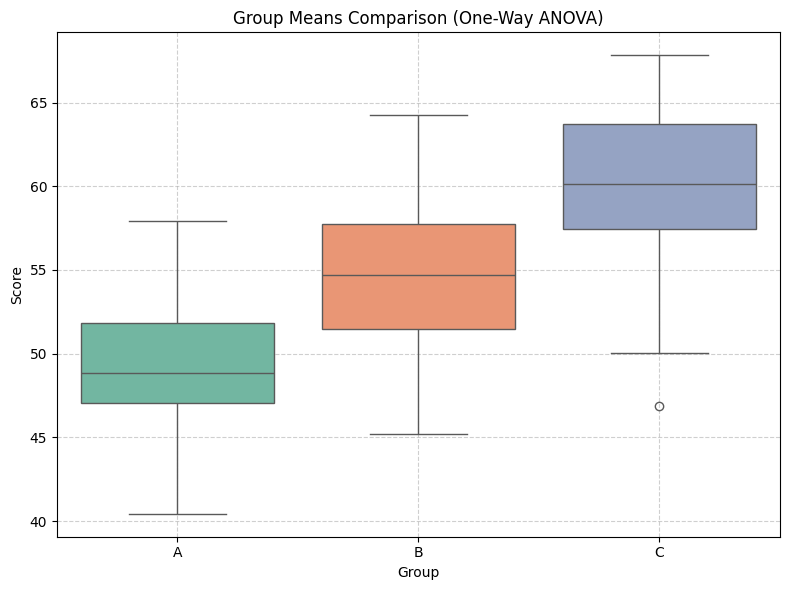

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate data
np.random.seed(42)
group_A = np.random.normal(loc=50, scale=5, size=30)
group_B = np.random.normal(loc=55, scale=5, size=30)
group_C = np.random.normal(loc=60, scale=5, size=30)

# Combine into a DataFrame
data = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

# Step 2: Perform one-way ANOVA
f_stat, p_value = f_oneway(group_A, group_B, group_C)

# Step 3: Print results
print("=== One-Way ANOVA Results ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"✔ Since p-value < {alpha}, we reject the null hypothesis.")
    print("There is a significant difference between group means.")
else:
    print(f"✖ Since p-value ≥ {alpha}, we fail to reject the null hypothesis.")
    print("No significant difference between group means.")

# Step 5: Visualize group means with boxplots
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Score', data=data, palette='Set2')
plt.title('Group Means Comparison (One-Way ANOVA)')
plt.xlabel('Group')
plt.ylabel('Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate two normal distributions
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=100)
group2 = np.random.normal(loc=53, scale=5, size=100)  # different mean

# Step 2: Perform two-sample (independent) t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Step 3: Print results
print("=== Two-Sample T-Test ===")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"✔ p-value < {alpha}: Reject null hypothesis.")
    print("Means are significantly different.")
else:
    print(f"✖ p-value ≥ {alpha}: Fail to reject null hypothesis.")
    print("No significant difference in means.")

# Step 5: Visualization
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(group1, kde=True, color="skyblue", label="Group 1")
sns.histplot(group2, kde=True, color="salmon", label="Group 2")
plt.title("Histogram of Group Distributions")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=[group1, group2], palette=["skyblue", "salmon"])
plt.xticks([0, 1], ["Group 1", "Group 2"])
plt.title("Boxplot Comparison")
plt.ylabel("Value")

plt.tight_layout()
plt.show()


24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results

In [ ]:
import numpy as np
import scipy.stats as stats

# Step 1: Simulate sample data
np.random.seed(42)
sample = np.random.normal(loc=50, scale=5, size=30)  # population std dev = 5

# Step 2: Known population variance under H0
sigma0_squared = 25  # i.e., σ0 = 5

# Step 3: Sample statistics
n = len(sample)
sample_variance = np.var(sample, ddof=1)

# Step 4: Chi-square test statistic
chi2_stat = (n - 1) * sample_variance / sigma0_squared

# Step 5: Critical values for two-tailed test
alpha = 0.05
df = n - 1
chi2_crit_low = stats.chi2.ppf(alpha / 2, df)
chi2_crit_high = stats.chi2.ppf(1 - alpha / 2, df)

# Step 6: P-value
p_value = 2 * min(
    stats.chi2.cdf(chi2_stat, df),
    1 - stats.chi2.cdf(chi2_stat, df)
)

# Step 7: Results
print("=== Chi-Square Variance Test ===")
print(f"Sample Variance: {sample_variance:.4f}")
print(f"Test Statistic (χ²): {chi2_stat:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"Critical χ² values (α={alpha}): [{chi2_crit_low:.4f}, {chi2_crit_high:.4f}]")
print(f"P-value: {p_value:.4f}")

# Step 8: Interpretation
if chi2_stat < chi2_crit_low or chi2_stat > chi2_crit_high:
    print("✔ Reject the null hypothesis: Variance is significantly different.")
else:
    print("✖ Fail to reject the null hypothesis: No significant difference in variance.")


25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [8]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Step 1: Input data
# Example: Group A: 45 successes out of 100; Group B: 30 successes out of 100
successes = np.array([45, 30])  # Number of successes in each group
n_obs = np.array([100, 100])    # Number of observations in each group

# Step 2: Perform Z-test for proportions
z_stat, p_value = proportions_ztest(count=successes, nobs=n_obs, alternative='two-sided')

# Step 3: Print results
print("=== Z-Test for Two Proportions ===")
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpret the result
alpha = 0.05
if p_value < alpha:
    print(f"✔ Since p-value < {alpha}, we reject the null hypothesis.")
    print("There is a significant difference between the proportions.")
else:
    print(f"✖ Since p-value ≥ {alpha}, we fail to reject the null hypothesis.")
    print("No significant difference between the proportions.")


=== Z-Test for Two Proportions ===
Z-statistic: 2.1909
P-value: 0.0285
✔ Since p-value < 0.05, we reject the null hypothesis.
There is a significant difference between the proportions.


26.  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results

=== F-Test for Equality of Variances ===
Variance 1: 21.7934
Variance 2: 6.8800
F-statistic: 3.1677
Degrees of freedom: df1 = 49, df2 = 49
P-value: 0.0001
✔ Since p-value < 0.05, reject the null hypothesis.
Variances are significantly different.


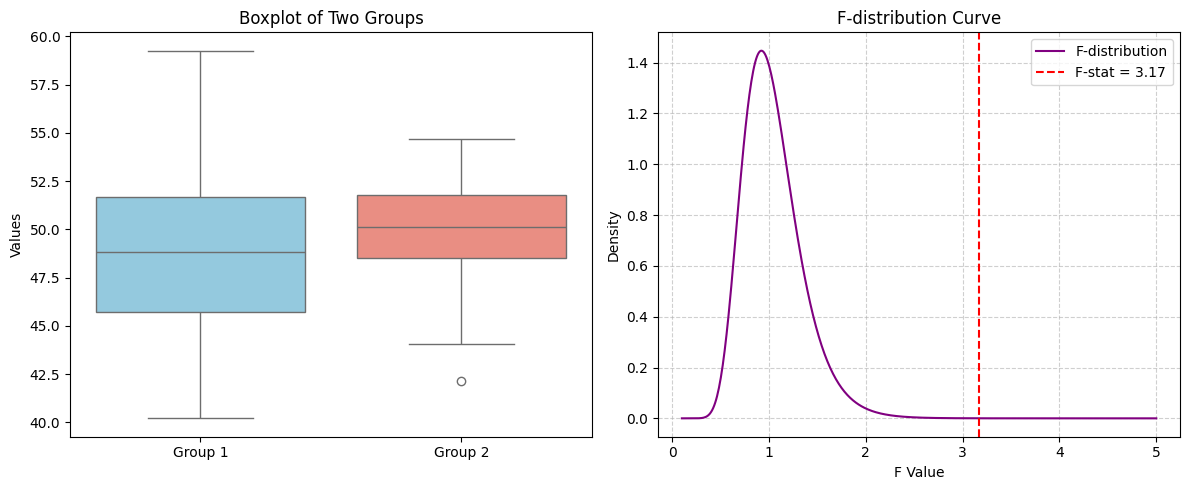

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate data for two groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=50)   # std dev = 5
group2 = np.random.normal(loc=50, scale=3, size=50)   # std dev = 3

# Step 2: Calculate sample variances
var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

# Ensure F >= 1 by ordering
if var1 > var2:
    f_stat = var1 / var2
    dfn, dfd = len(group1) - 1, len(group2) - 1
else:
    f_stat = var2 / var1
    dfn, dfd = len(group2) - 1, len(group1) - 1

# Step 3: P-value for two-tailed test
p_value = 2 * min(
    stats.f.cdf(f_stat, dfn, dfd),
    1 - stats.f.cdf(f_stat, dfn, dfd)
)

# Step 4: Print results
print("=== F-Test for Equality of Variances ===")
print(f"Variance 1: {var1:.4f}")
print(f"Variance 2: {var2:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"Degrees of freedom: df1 = {dfn}, df2 = {dfd}")
print(f"P-value: {p_value:.4f}")

# Step 5: Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"✔ Since p-value < {alpha}, reject the null hypothesis.")
    print("Variances are significantly different.")
else:
    print(f"✖ Since p-value ≥ {alpha}, fail to reject the null hypothesis.")
    print("No significant difference in variances.")

# Step 6: Visualization - Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=[group1, group2], palette=['skyblue', 'salmon'])
plt.xticks([0, 1], ['Group 1', 'Group 2'])
plt.title('Boxplot of Two Groups')
plt.ylabel('Values')

# Step 7: Visualization - F-distribution
plt.subplot(1, 2, 2)
x = np.linspace(0.1, 5, 500)
f_pdf = stats.f.pdf(x, dfn, dfd)
plt.plot(x, f_pdf, label='F-distribution', color='purple')
plt.axvline(f_stat, color='red', linestyle='--', label=f'F-stat = {f_stat:.2f}')
plt.title('F-distribution Curve')
plt.xlabel('F Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

=== Chi-square Goodness-of-Fit Test ===
Observed counts: [19 32 26 23]
Expected counts: [25 25 25 25]
Chi-square statistic: 3.6000
P-value: 0.3080
✖ p-value ≥ 0.05: Fail to reject the null hypothesis.
No significant difference between observed and expected frequencies.


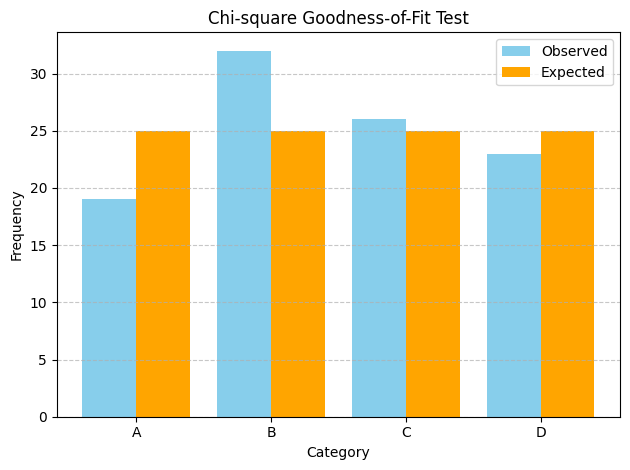

In [10]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Simulate observed data (e.g., observed counts for 4 categories)
np.random.seed(42)
observed = np.random.multinomial(n=100, pvals=[0.2, 0.3, 0.3, 0.2])
expected_proportions = np.array([0.25, 0.25, 0.25, 0.25])  # Uniform expected distribution
expected = expected_proportions * np.sum(observed)

# Step 2: Perform Chi-square goodness-of-fit test
chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)

# Step 3: Print results
print("=== Chi-square Goodness-of-Fit Test ===")
print(f"Observed counts: {observed}")
print(f"Expected counts: {expected.astype(int)}")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Step 4: Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"✔ p-value < {alpha}: Reject the null hypothesis.")
    print("Observed data significantly differs from expected distribution.")
else:
    print(f"✖ p-value ≥ {alpha}: Fail to reject the null hypothesis.")
    print("No significant difference between observed and expected frequencies.")

# Step 5: Visualization
categories = ['A', 'B', 'C', 'D']
x = np.arange(len(categories))

plt.bar(x - 0.2, observed, width=0.4, label='Observed', color='skyblue')
plt.bar(x + 0.2, expected, width=0.4, label='Expected', color='orange')
plt.xticks(x, categories)
plt.title('Chi-square Goodness-of-Fit Test')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
